<h1 style="background-color:powderblue; text-align:center">Decision Tree and RF</h1>

<h3>Intro</h3>
Here I have explained basics about Decision tree and random forest model.<br> How they work. What are there advantages and disadvantages, how to use them in python and make our lives easier.

<h2>Decision Tree</h2>

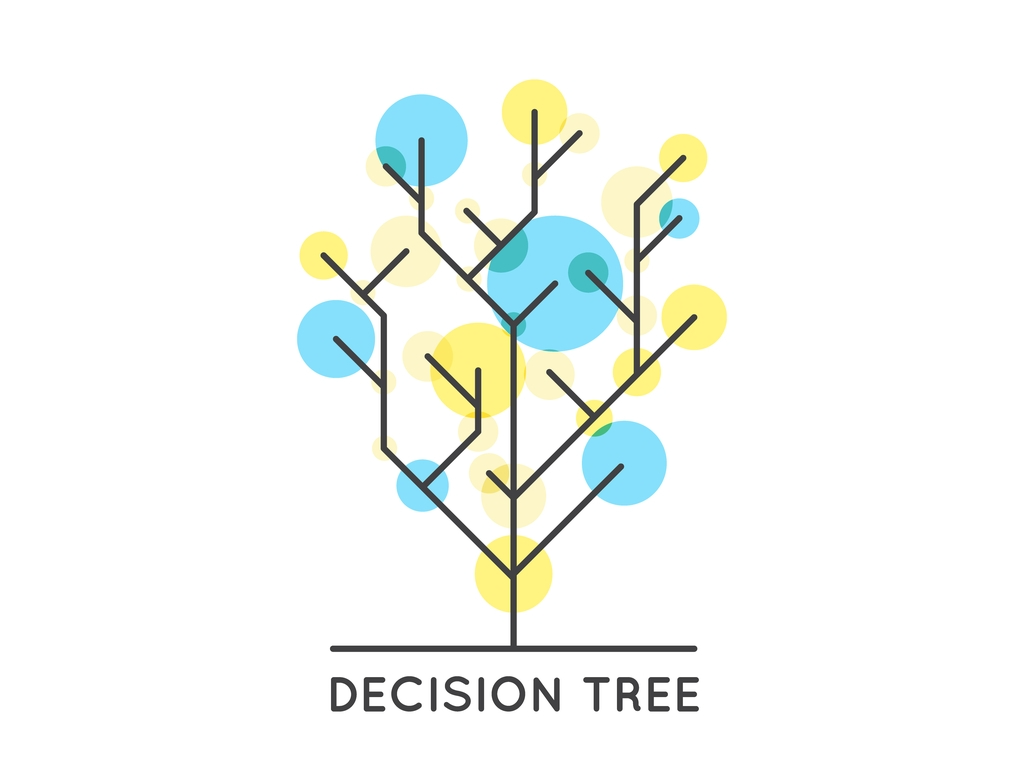

In [18]:

from IPython.display import Image
Image(filename='C:\\Users\\NAVIN PATWARI\\Desktop\\tree.png',width = 300,height =300 ) 

As you would be well familiar with the use of if-else statement in general programming. A Decision Tree is very similar to the same. In fact that is a decision tree in which we trained the computer how to decide whether a given number is odd or even.

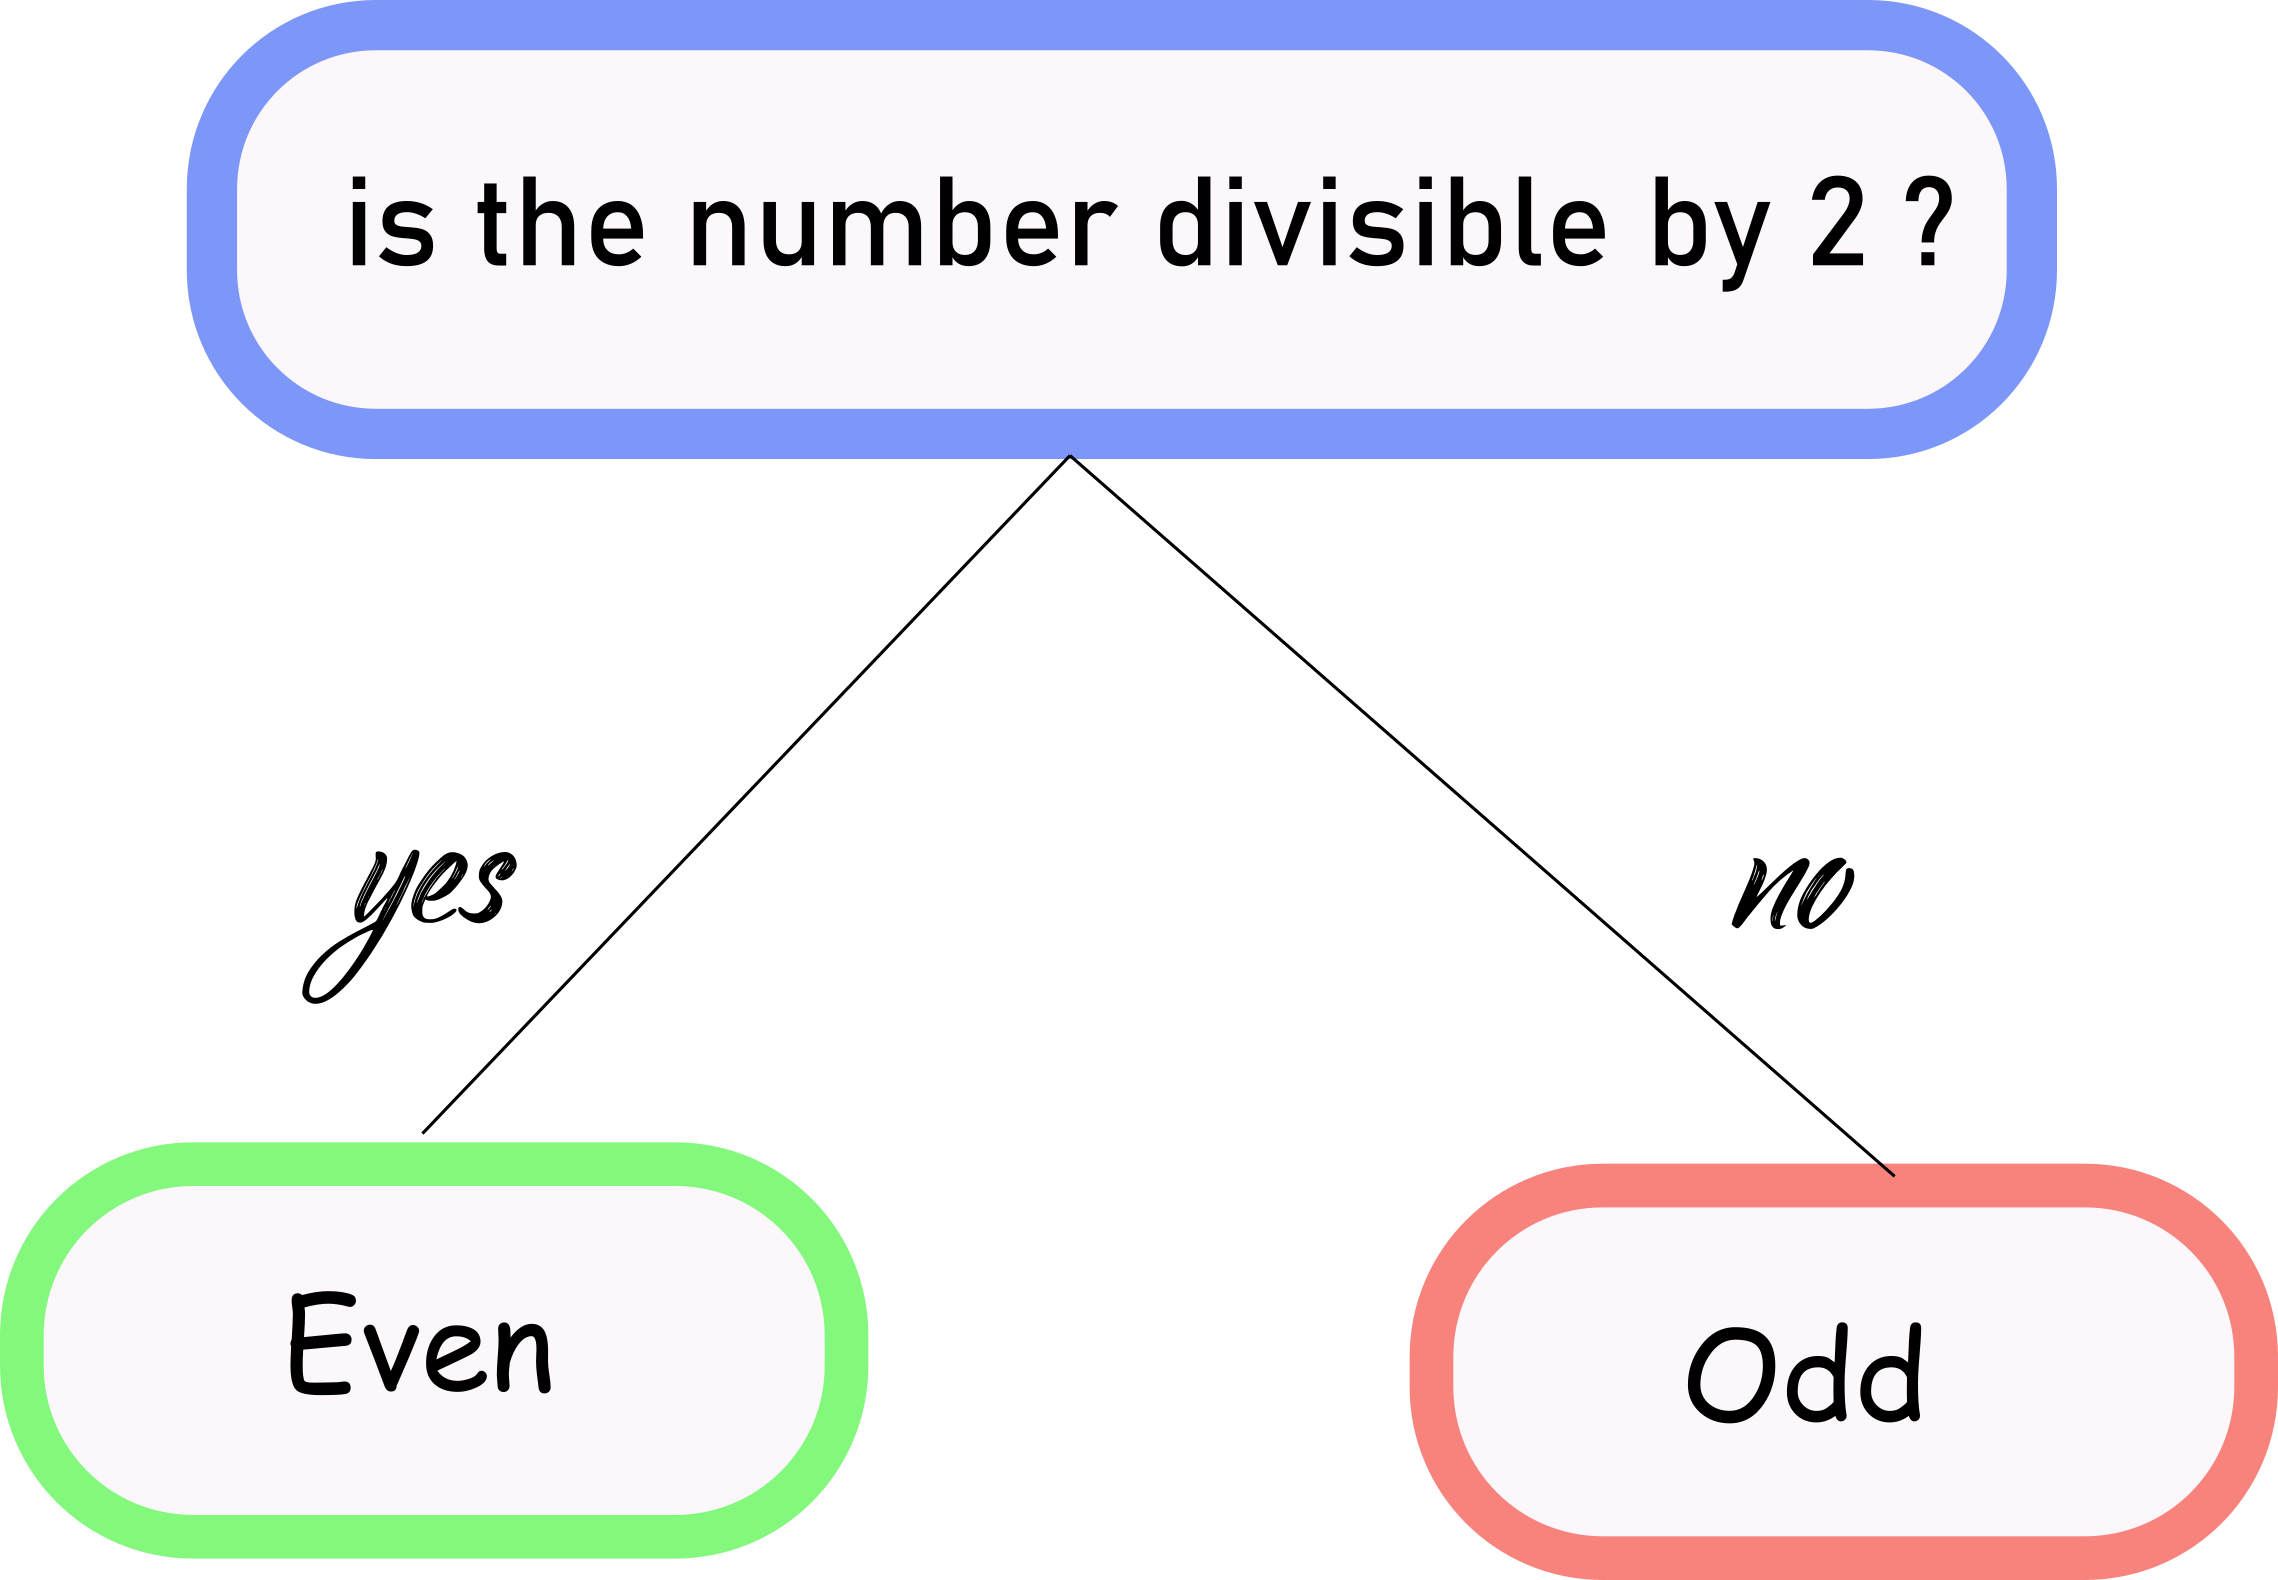

In [7]:
from IPython.display import Image
Image(filename='C:\\Users\\NAVIN PATWARI\\Desktop\\basic tree.png',width = 500,height =500 ) 

If not mentioned, we take the left child as successor if the condition holds

<h3>CART</h3>

According to google search,<br>
A Classification and Regression Tree(CART) is a predictive algorithm used in machine learning. It explains how a target variable's values can be predicted based on other values. It is a decision tree where each fork is split in a predictor variable and each node at the end has a prediction for the target variable.

More generally, from a CART we can ask different questions to classify our things and predict output.<br>
Above was a very simple example of a Decision Tree and the trees can be much more complicated with many more questions and nodes.<br>Also, the more is the height of tree, the better it fits with the training data.<br>

<h3>How are Decision Trees made?</h3>

Any tree type of data structure has a root node and some chidrens followed by their children till the point where there is no successor and these nodes are called leaf nodes.
Similarly there is a root/most important question followed by multiple sub-questions till we reach a leaf which is a decision

In [8]:
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [9]:
df = pd.read_csv("C:\\Users\\NAVIN PATWARI\\Desktop\\fiver.csv")
df.head()
model = tree.DecisionTreeClassifier(max_depth = 3)
y = df['label'].astype(str)
X = df.loc[:,['X1','X2','X3','X4']]
X_train,X_val,y_train,y_val = train_test_split(X,y,random_state = 0) 
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

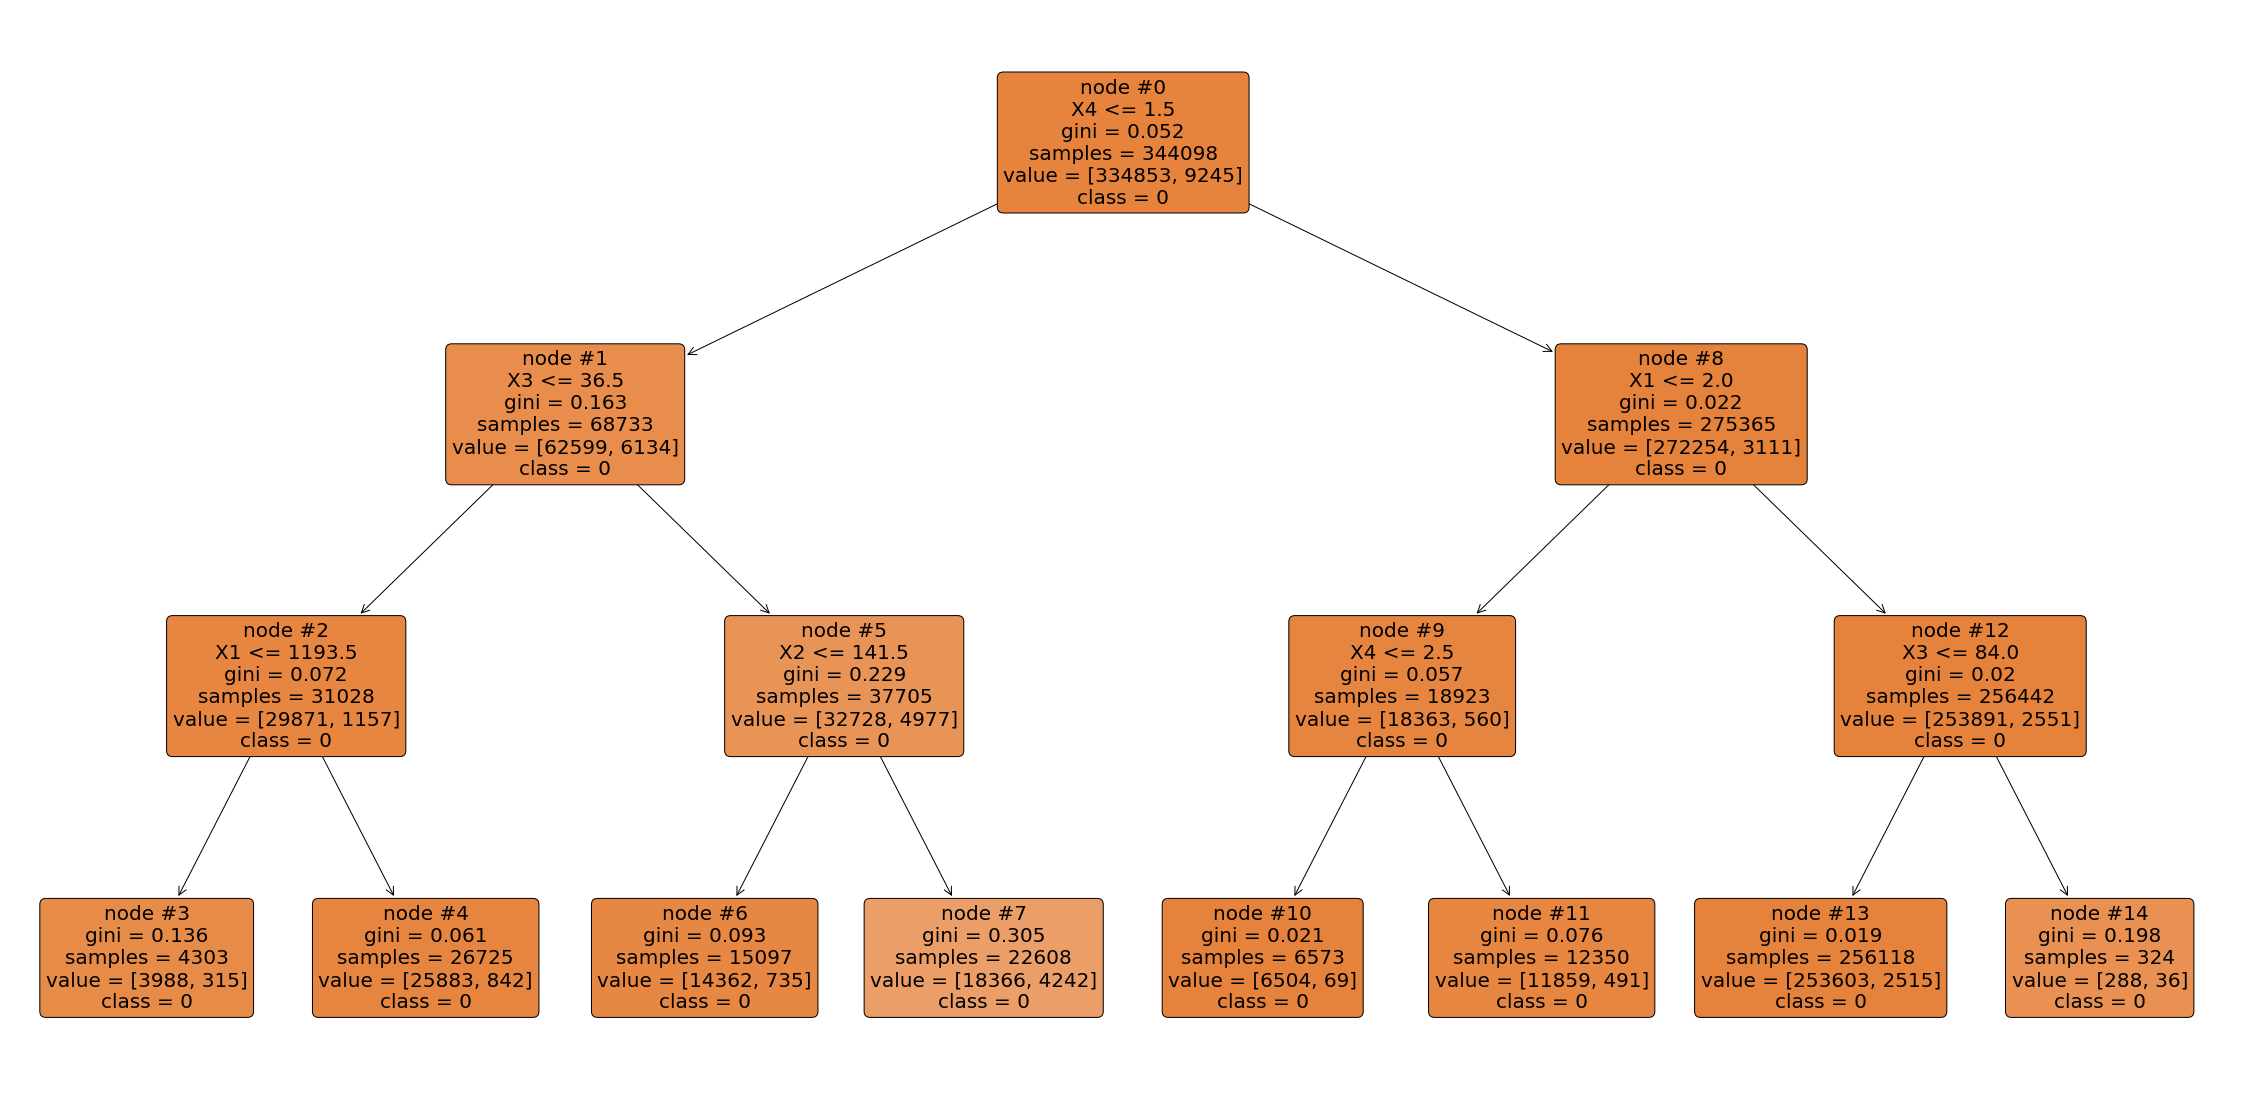

In [10]:
plt.figure(figsize=(40,20)) 
_ = tree.plot_tree(model,
                   feature_names = list(X.columns.values),
                   class_names=np.unique(y),filled=True,
                   node_ids=True,
                   impurity=True,
                   label="all",
                   fontsize=20, rounded = True)
plt.show()

This is a simple decision tree generated by the complier using sklearn library in python.<br>

let's look at a node and try to understand what are the stuffs written inside it.

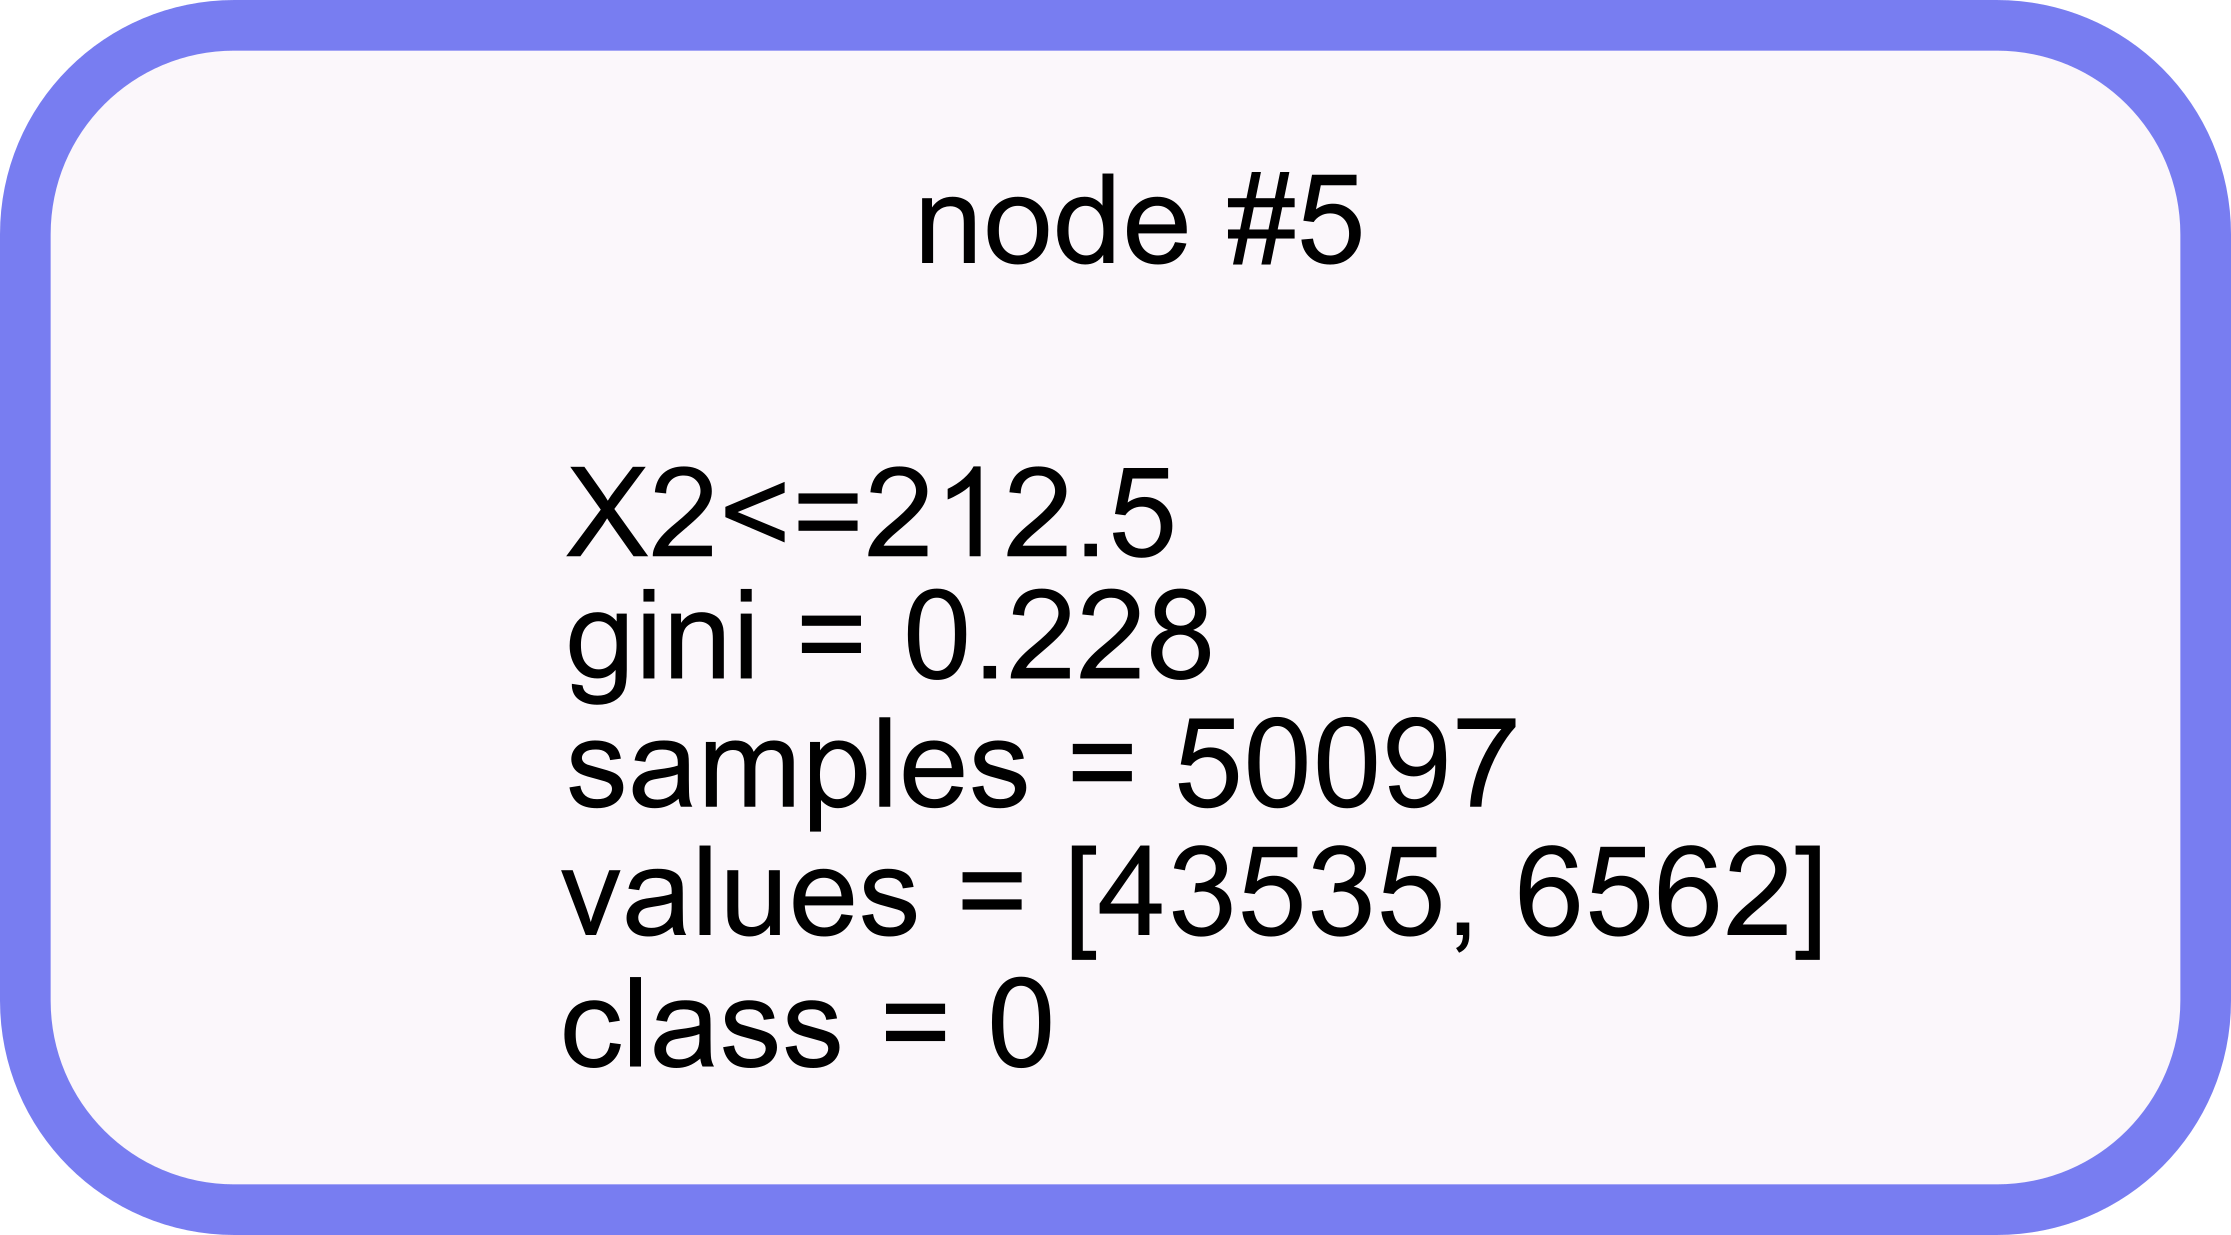

In [11]:
from IPython.display import Image
Image(filename='C:\\Users\\NAVIN PATWARI\\Desktop\\sample node.png',width = 300,height =300 ) 

The first line <b><i> x2 <= 212.5 </i></b> is called <b>Statement</b> based upon which decision is made whether we need to go left or right.<br> As mentioned earlier, if the statement is true, we follow the left else we proceed towards right.

<h3><b>Gini Impurity</b></h3><br> is used to determine the purity of the node. It is one of the <b>Attribute Selective Measure</b> (ASM) which helps us to determine which node will be the root node in our decision tree. <br>Before explaining gini impurity it is important to know what an <b>impurity</b> is. Sticking back to the first example of binary classification, suppose we need to determine if a number is prime or not using the same condition of divisibility by 2.<br>
We know for sure that if a number is divisible by 2 and is not equal to 2 then the number is composite.<br>
But all the numbers that are not divisible by 2 are not prime.
Thus, the results we obtain are not consistent all the time.


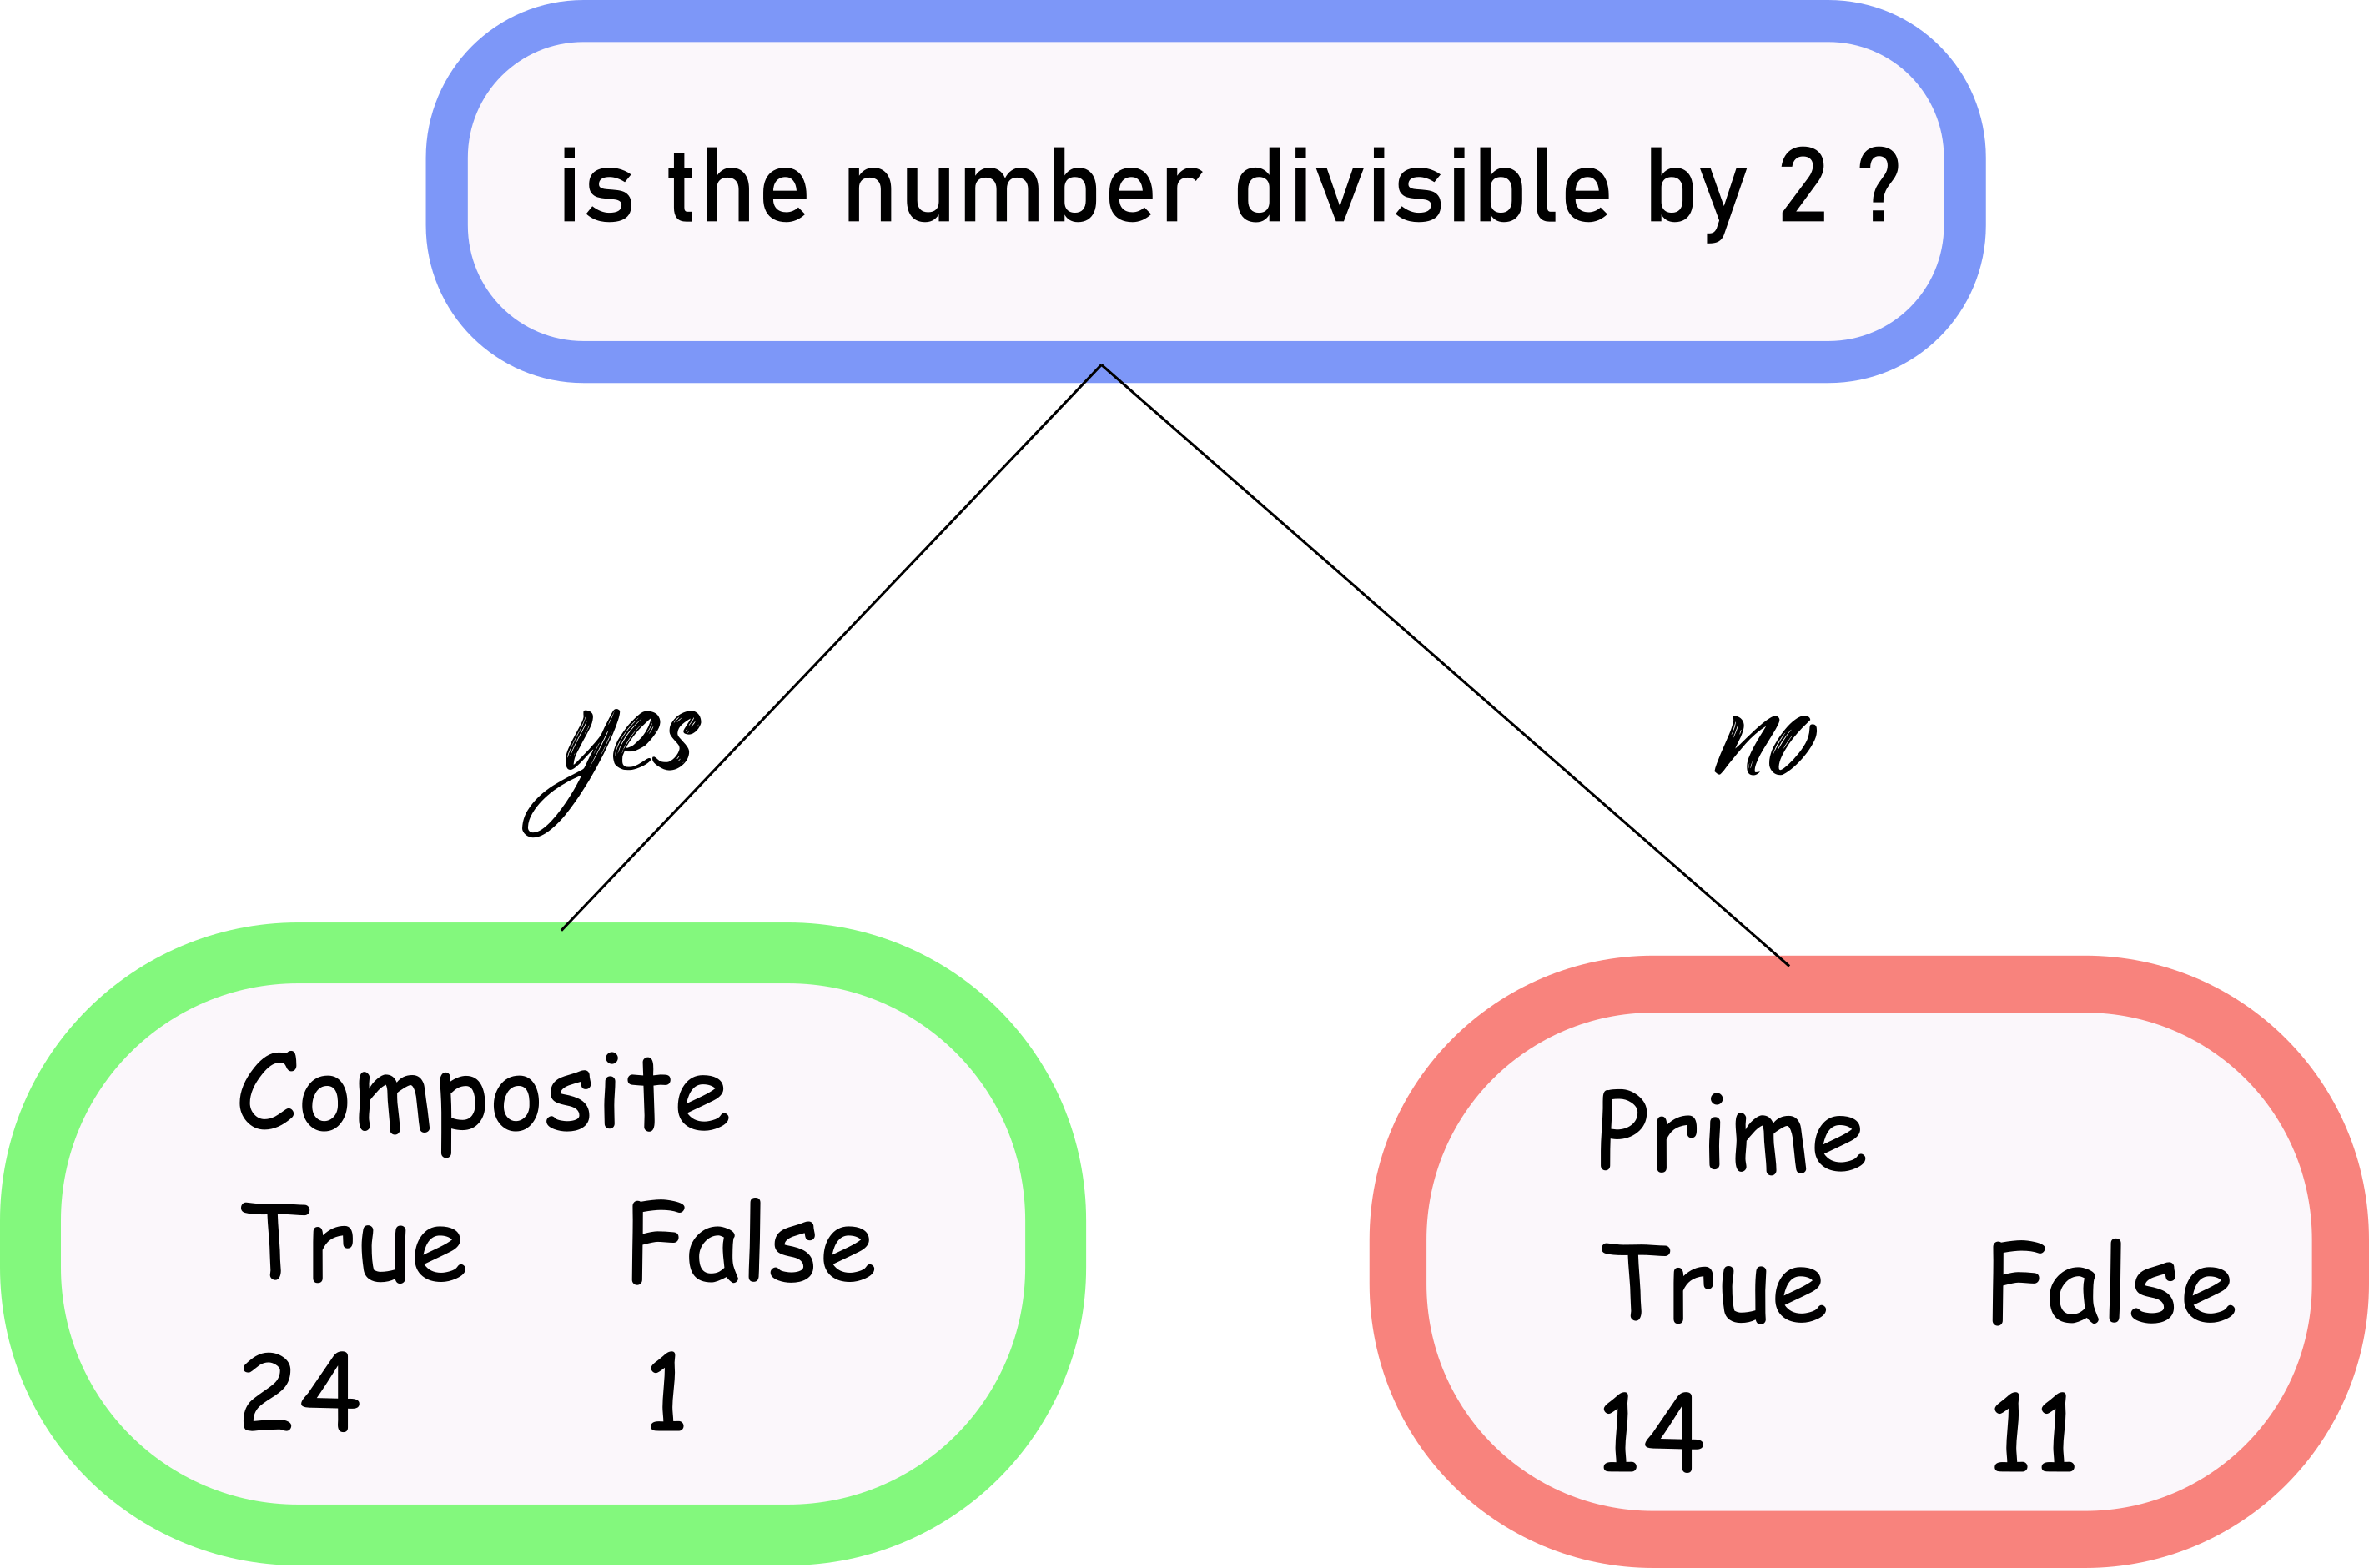

In [12]:
from IPython.display import Image
Image(filename='C:\\Users\\NAVIN PATWARI\\Desktop\\gini.png',width = 500,height =500 ) 

For natural numbers between 1 to 50, every number divisible by 2 is composite except 2 itself. Also, there are only 14 odd numbers that are prime, rest 11 are composite.<br>
So, in this case gini impurity in the left node can be calculated as:<br>

${Impurity} = 1 - P(Y)^{2} - P(N)^{2}$

When calculated, we get:

$ impurity_{ left} = 0.0768$<br>
$impurity_{ right} = 0.4923$

As you can see, the impurity when majority of the decisions were of same type is much less compared to the case where they are divided almost equally.<br>
The impurity of this node is simply the wighted average of the two child nodes. Thus

$impurity_{tree} = 0.28455$

In the above tree, you might have noticed that at lower levels, the value of this impurity is generally higher than parent nodes.This is because, higher impurity implies lesser reliance and therefore doesn't help in taking good decisions.<br>

There are certain other impurities we may use such as entropy and information gain but ginni impurity is the most poppular and the simplest one.

for multiple values, we may use<br>
$ Gini = 1 - \sum\limits_{i=1}^{n} (P_{i})^2$

where $P_{i}$ is the probability of ith outcome 

<h3>Height</h3>
<br>
The height of tree has significant effect in the correctness of our model. For a tree with very low height, model might became underfit and for very high value,it may became overfit. Thus, the optimal value of height lies somewhere in the middle

In [13]:
from sklearn.metrics import mean_absolute_error
ans=[]
df = pd.read_csv("C:\\Users\\NAVIN PATWARI\\Desktop\\housing price.csv")
#df.head()
#print(df['LotConfig'])
#df.columns

In [14]:
import math
ans=[None]
org = [None]
def calc(h,X_train,y_train,X_val,y_val):
    model = tree.DecisionTreeRegressor(max_depth = h)
    model.fit(X_train,y_train)
    pred = model.predict(X_val)
    pred1 = model.predict(X_train)
    r = mean_absolute_error(y_val,pred)
    r1 = mean_absolute_error(y_train,pred1)
    #print(r,h)
    ans.append(r)
    org.append(math.log(r1,10))
y = df['SalePrice']
X = df.loc[:,['LotArea','YrSold']]
X_train,X_val,y_train,y_val = train_test_split(X,y,random_state = 0) 
for i in range(1,9):
    calc(i,X_train,y_train,X_val,y_val)

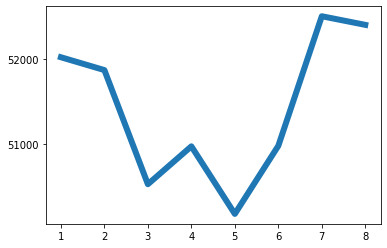

In [15]:
ans = pd.DataFrame(ans)
org = pd.DataFrame(org)
plt.locator_params(axis='y', nbins=3)
plt.plot(ans,linewidth = 6)
#plt.plot(org)

As you can see from the plot, we get a very less value of Mean Absolute Error (MAE) near 5. And thus, you can say that this height best fits the model.

<h3>Cross Validation</h3>
<br>
If you observed the code, if you see my code then there is a train_test_split phrase used in it. Actualy, We divide data into certain ratios to keep some data unseen by our model so that we can use it to predict model's accuracy using measures like MAE, cofusion matrix, true positive, true negative, etc. The most basic is MAE given by <br>
$ {MAE} = \frac{\sum_{i=0}^{n} | y_{i} - x_{i} |}{n}$<br>
While these help us to quantify accurracy and precision of our model, Cross Validation helps us to reduce that. In Cross Validation we iterate over different sets of data to prevent our model from getting overfit or underfit and check while set of values best trains the model using the same parameters

<h3>Pruning</h3>
<br>
According to wikipedia, <br>Pruning is a data compression technique in machine learning and search algorithms that reduces the size of decision trees by removing sections of the tree that are non-critical and redundant to classify instances. Pruning reduces the complexity of the final classifier, and hence improves predictive accuracy by the reduction of overfitting.<br>
As mentioned earlier, a tree with large maximum depth will be overfit and thus we use pruning to reduce/compress the tree. There are several methods to do this and the most common one is <b>Reduced Error Pruning</b> since it is simple and speed and other one is <b>Cost somplexity pruning</b>
<h5>REP</h5>
As long as pruning doesn't deteriorate the performance of our model,<br>
select a non-leaf node and temporarily prune the subtree below it. Assign a leaf to it, labelled with curent majority class at that node.<br>
Measure and record the accuracy of pruned tree on validation set. If accuracy increases significantly, make the pruning permanent<br>
<h5>Cost Complexity Pruning</h5>

Calculate the <b>sum of the square residuals</b> SSR for each tree that is formed by different levels of pruning.<br>
Sum of square residuals of a tree is the summation of all the square residuals i.e. $\sum({predicted} - {actualvalue})^{2}$ at every leaf node of the tree.<br>
Determine the tree score using the formula<br><br>
$ TreeScore = SSR + \alpha T$<br><br> where,<br>$T$ is the number of leaf nodes <br> $\alpha$ is a tuning parameter generally calculated using cross validation and assumed to be 0 for full tree<br>And select the tree with the maximum score pruning

to conclude,a list of parameters which we can adjust to make our tree better and their default value is given in the codec cell below. 

In [23]:
model = tree.DecisionTreeClassifier(criterion='gini',
                                    splitter='best',
                                    max_depth=None,
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    min_weight_fraction_leaf=0.0,
                                    max_features=None,
                                    random_state=None,
                                    max_leaf_nodes=None,
                                    min_impurity_decrease=0.0,
                                    class_weight=None,
                                    ccp_alpha=0.0)

Decision Trees are very easy to visualize and takes comparatively less time to build and predict. Also, non-linear relationship between parameters doesn't affect tree's performance.
However, there is always some scope of overfitting caused due to variance in them. To tackle this, we introduce the concept of Random Forest.<br>
Its important to note that although Random Forest will outperform Decision Tree, Decision Tree are beginer friendly and is computed much faster.

<h2>Random Forest</h2>

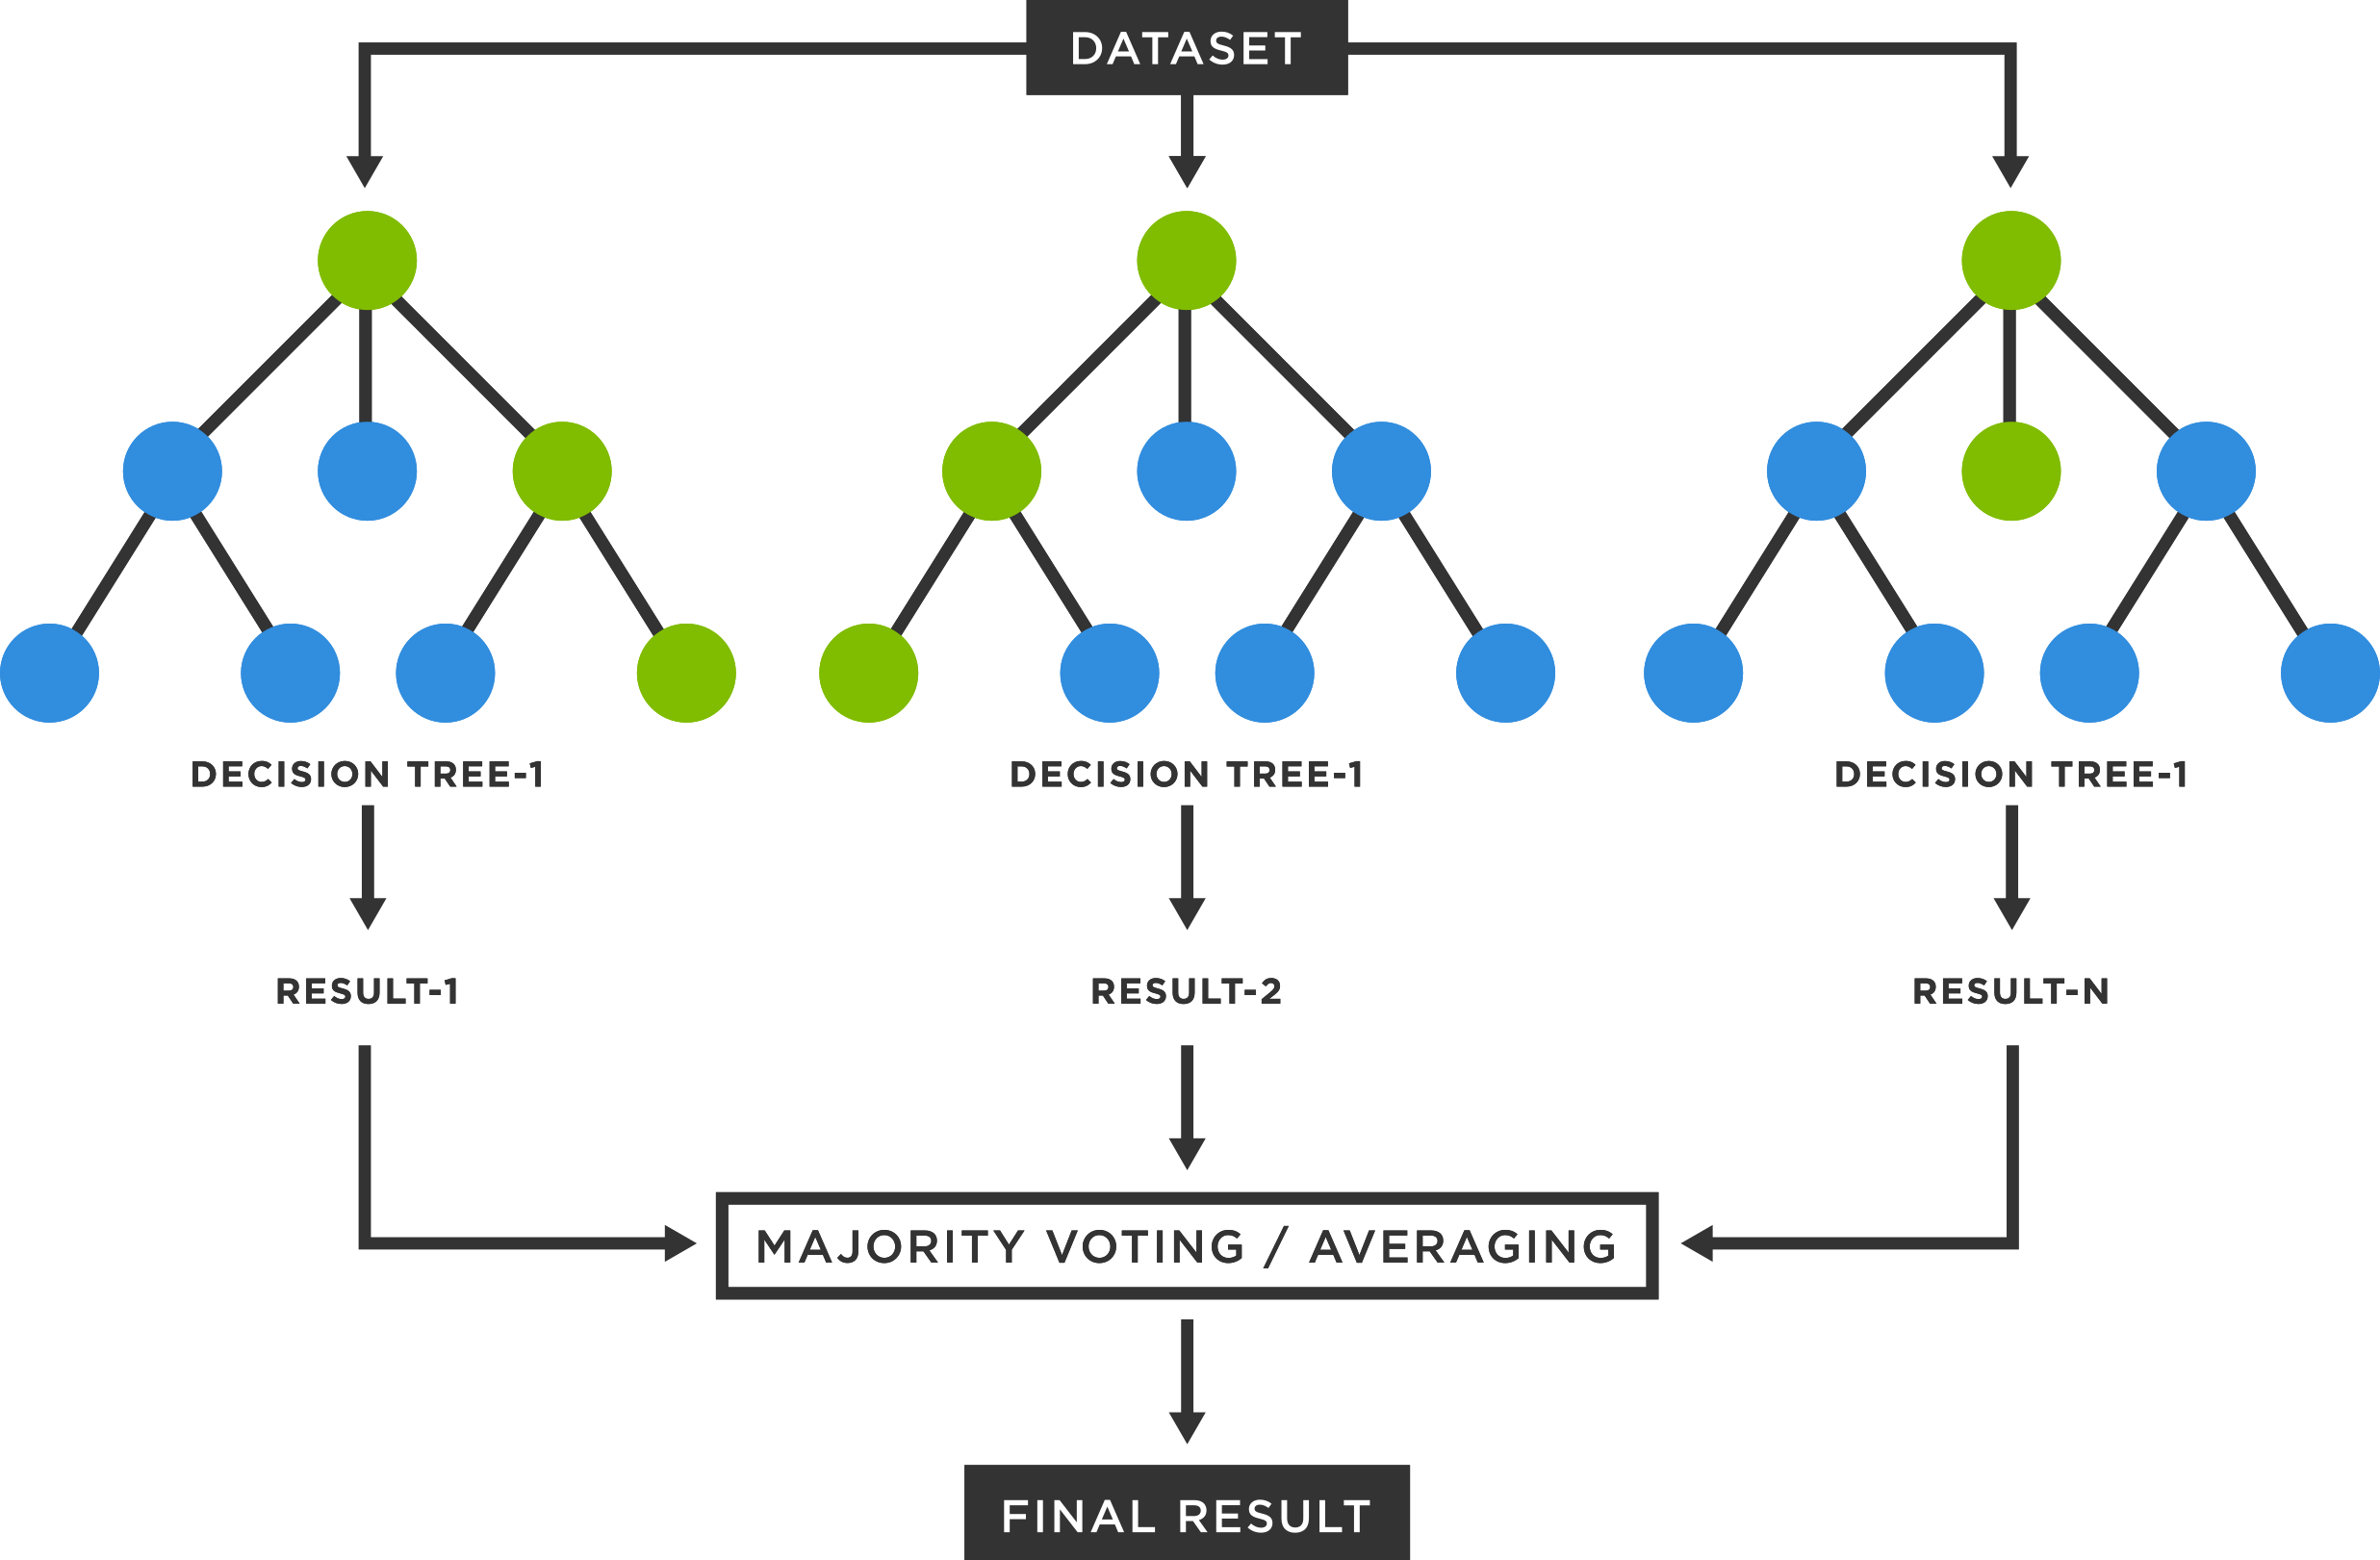

In [21]:
from IPython.display import Image
Image(filename='C:\\Users\\NAVIN PATWARI\\Desktop\\Random Forest.png',width = 650,height =650 ) 

As we are familiar with its literal meaning, Forest is a collection of trees. Similarly, Random Forest is a collection of randomly made decision trees which helps in improving the flexibility of the decision tree.This model inceases is more flexible than a simple Decision Tree because of its algorithm.

<h3> How are RF created ?</h3>

First of all, We create a <b>bootstrapped dataset</b> from the given dataset by selecting various rows in a random fashion. As you might guess, this will result in some rows being repeated and some rows never included in the training dataset. Well, set of those rows that are not used in making bootstrap dataset are reffered to as <b>Out-of-bag (OOB) dataset</b> and can be used for validation. Typically, 1/3 of the dataset goes into this category.

Then make a decision on few rows randomly selected from the bootstap dataset.

Repeat the process $n$ number of times where $n$ can be as large as thousands of trees.<br>Thus, we have created a forest that contains $n$ number of trees.

<h5>Original Dataset</h5>

In [80]:
data = pd.read_csv("C:\\Users\\NAVIN PATWARI\\Desktop\\processed.csv")
data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63,1,1,145,233,1,2,150,0,2.3,44.186667,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,35.400000,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,37.640000,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,60.200000,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,52.093333,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,44.080000,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,37.960000,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,28.413333,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,51.000000,1,3,1


<h5>Sample BootStrap Dataset</h5>

In [52]:
import random
a=[]
for i in range(202):
    a.append(data.loc[random.randint(0,303)])
a = pd.DataFrame(a)
a

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
27,66,0,1,150,226,0,0,114,0,2.6,33.240000,0,3,0
2,67,1,4,120,229,0,2,129,1,2.6,37.640000,2,7,1
219,59,1,4,138,271,0,2,182,0,0.0,54.800000,0,3,0
10,57,1,4,140,192,0,0,148,0,0.4,40.626667,0,6,0
86,47,1,3,138,257,0,2,156,0,0.0,49.400000,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,51,1,3,100,222,0,0,143,1,1.2,43.213333,0,3,0
69,46,1,3,150,231,0,0,147,0,3.6,46.506667,0,3,1
92,62,1,3,130,231,0,0,146,0,1.8,42.320000,3,7,0
130,54,1,3,120,258,0,2,147,0,0.4,45.826667,0,7,0


<h5>Sample data to make one of the decision tree</h5>

In [53]:
at = list(a.columns)
x=[]
for i in range(0,5):
    random_index = random.randint(0,len(at))
    x.append(at[random_index])
x = pd.DataFrame(data[x])
print(x)

     cp  thalach thal  cp  hd
0     1      150    6   1   0
1     4      108    3   4   2
2     4      129    7   4   1
3     3      187    3   3   0
4     2      172    3   2   0
..   ..      ...  ...  ..  ..
298   1      132    7   1   1
299   4      141    7   4   2
300   4      115    7   4   3
301   2      174    3   2   1
302   3      173    3   3   0

[303 rows x 5 columns]


It is this variety in trees which makes the Random Forest model more flexible.
<br>
<h3>Accuracy Measurement</h3><br>
The out-of-bag data is used to validate our model. We use every out-of-bag sample for all trees to measure the accuracy of our model. Aggregate of the number of ones that were classified incorrectly is reffered to as <b>out-of-bag error</b>

<h3>How predictions are made ?</h3>
<br>
For a given set of data with various parameters, we run it on all the trees and the one which get maximum votes (for categorical data) or average (for continuous data) is predicted as the output.

This method of bootstaping a dataset and using aggregate to make decision is called <b>Bagging</b>

<h5>A tree from the forest</h5>

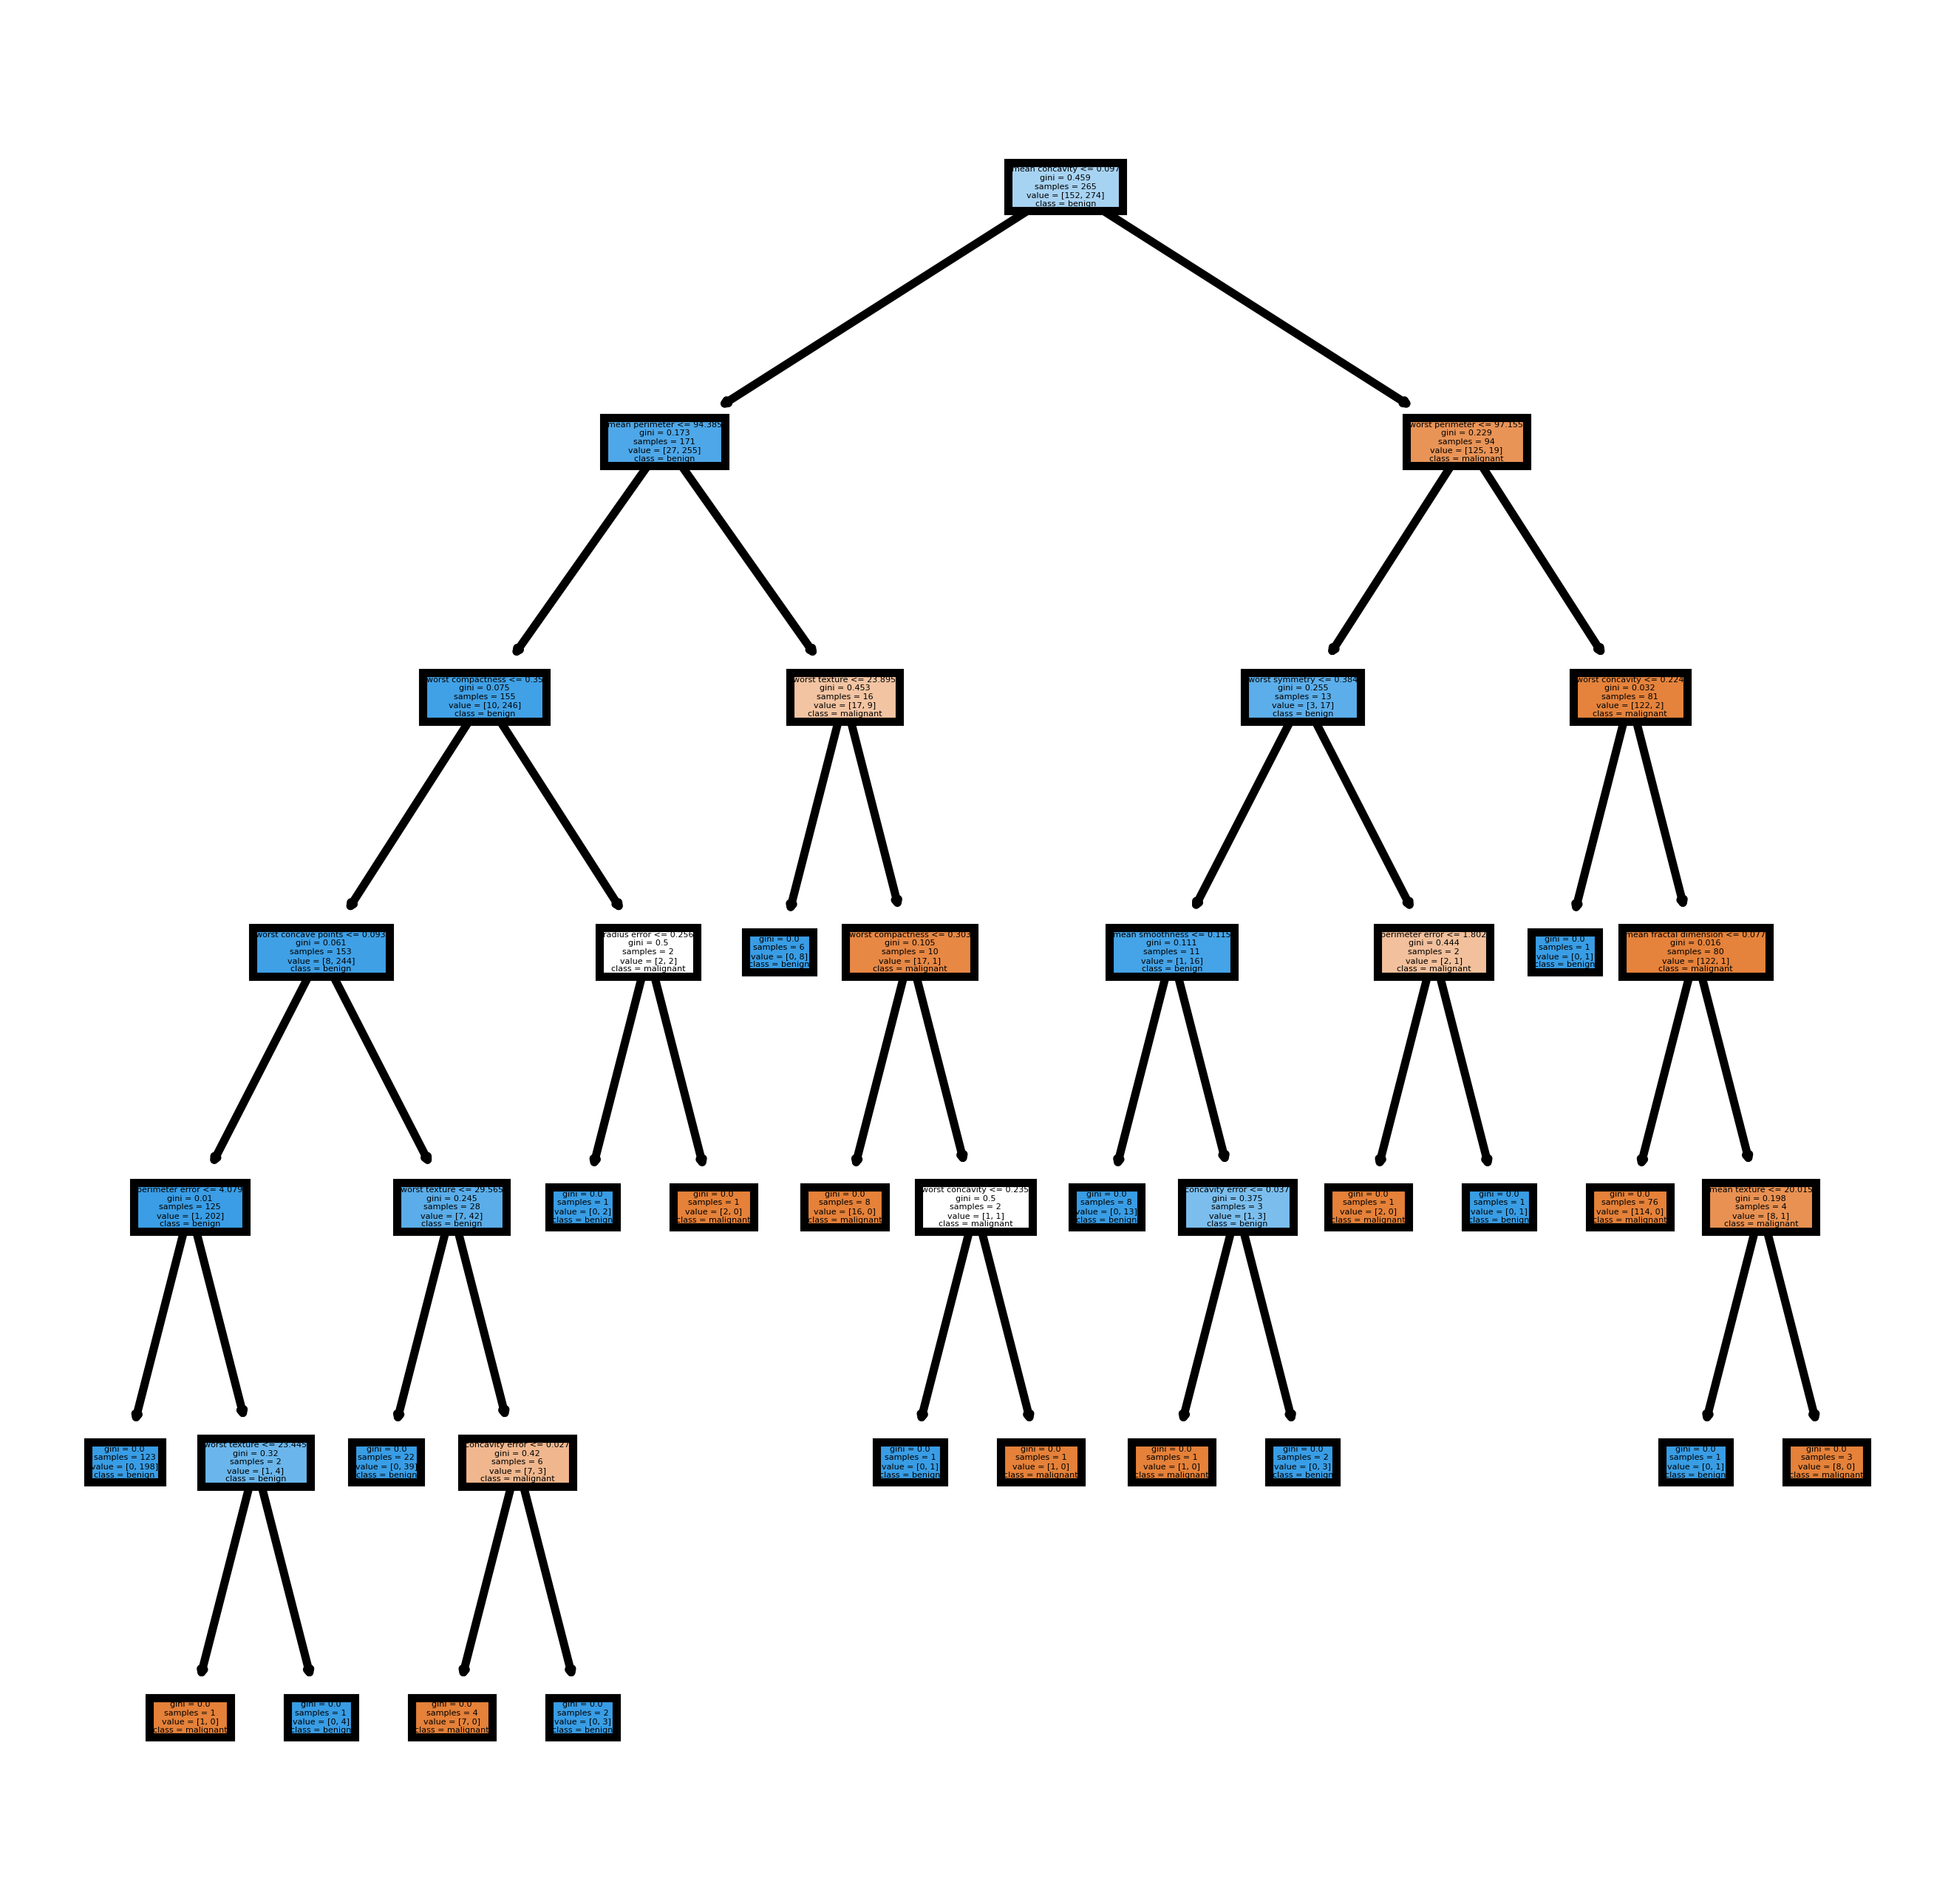

In [78]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn import tree
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the Breast Cancer Dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Arrange Data into Features Matrix and Target Vector
X = df.loc[:, df.columns != 'target']
y = df.loc[:, 'target'].values

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0)

# Random Forests in `scikit-learn` (with N = 100)
rf = RandomForestClassifier(n_estimators=100,
                            random_state=0)
rf.fit(X_train, Y_train)
fn=data.feature_names
cn=data.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

<h3>RF Imputation</h3>

Models such as RF can't handle missing values and generates error if a $?$ is passed to it. So to tackle this problem, imputation can be applied.
Imputation refers to filling the missing values in columns so that our model can use those columns as well.

Genral idea for dealing with missing is to make a guess like <b>mean</b> or <b>mode</b> and then refine the guess till it is a good guess.

Or we can fill the place with the same value that an another similar row has. By Similarity I mean to compare the values along the column.

Track of Similar samples are kept using <b>Proximity Matrix</b>

To create a Proximity Matrix<br>
Create a null matrix of size $n$ x $n$ where each column and each row represents a decision tree assuming there are $n$ trees in our forest. 
Add 1 to all the nodes that ended up at the same leaf node as the sample, in each tree of our Forest. Then divide each element with the total number of trees.
<br>

Weighted frequency of the output $i$ is calculate using :<br>
$ weighted \,frequency_{i} = P(i) \times W(i)$<br>
Where $W(i)$ is the weight of output $i$<br>
And $P(i)$ is the probability of $i$ in the given column for categorical data

Weight of i for categorical data is computed as:<br>
$W(i) = \frac{Proximity\,Of\,i}{Total\,Proximity}$

The one with the heighest weight frequency can be imputed at the missing place in the column.<br><br>
For Continuous data, we can impute the weighted average given by:<br>
$Weighted \,Average = \sum_{i=0}^{i=n}\,(V_{i} \times W(i))$<br>
Where $V_{i}$ is the value of column

This Weighted average is imputed at the missing place

Also, Distance matrix can be calculated using:<br>
$Distance = 1 - Proximity$<br>
This tells us how far is the data and sample vary.

Thus RF can also be used for imputation and can handle overfitting much better.<br>
Thanks<br>
-<i>Navin Patwari</i>